<a href="https://colab.research.google.com/github/lail-lei/AML/blob/main/project1/lailei_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1: Forrest Fires Linear Regressions**

## **Import Pandas and Create DataFrame**

In [76]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
import pandas as pd


# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np


# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sbn

# Read raw file from github into a dataframe
# forrest_fire data 
df = pd.read_csv('https://raw.githubusercontent.com/lail-lei/AML/main/project1/forestfires.csv')

In [77]:
# Check the dimensionality of the dataframe
df.shape

(517, 13)

## **Area and Temp**
The weather condition temperature is measured in Celsius.
Area represents the hectacres of forest burned in the fire. 


### **Data Processing**

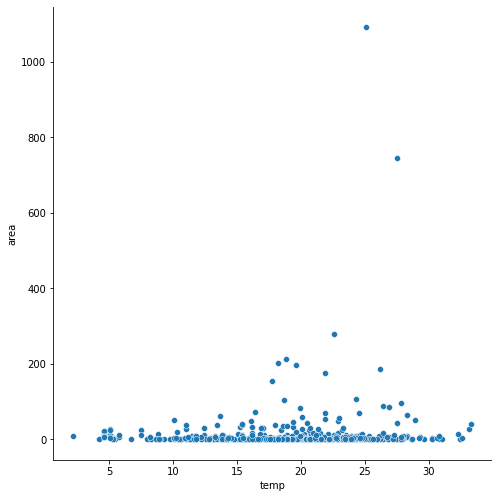

In [194]:
# First, create scatter plot for relationship between burned area and temp

sbn.pairplot(df, x_vars="temp", y_vars='area', height=7, aspect=1, kind='scatter')

There is a 1090.84 difference between the max and minimum values of hectres burned. The data is skewed very heavily toward burned areas smaller than 0 hectacres in size (positively skewed), as demonstrated by the following boxplot and distribution plot: 

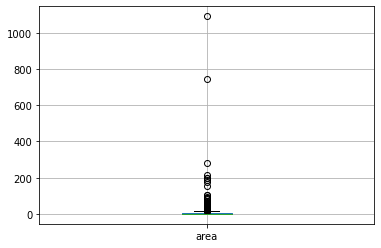

In [195]:
# Create a box plot to visualize distribution of area sizes
df.boxplot(column="area")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


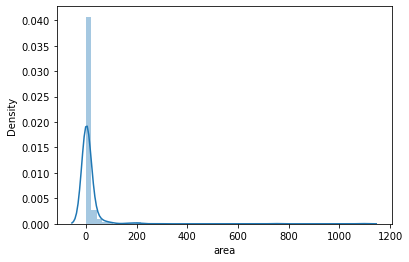

In [196]:
# Create a distribution plot to visualize distribution of area sizes
sbn.distplot(df["area"], kde=True, hist=True)

This uneven distribution might create problems when trying to model the data. 

Possible remedies I considered: 

1) exclude outliers

2) normalizing the data with logarithm transform (suggested by the webpage from which we downloaded the dataset).

I decided to normalize the data, as the distribution would still be uneven after excluding the outliers.







In [197]:
# Save column to be normalized
norm_area = pd.DataFrame(df["area"])

# Normalize the data using np log method (natural log). 
# Used a constant + 1 because the area contains many zeros and using a logarithm translation. 
df["norm_area"] = np.log10(norm_area + 1);



The normalized area column is still skewed but not as badly.

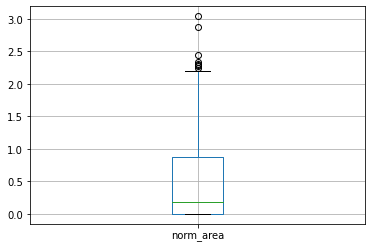

In [198]:
# Create a box plot to visualize distribution of area sizes
df.boxplot(column=["norm_area"])


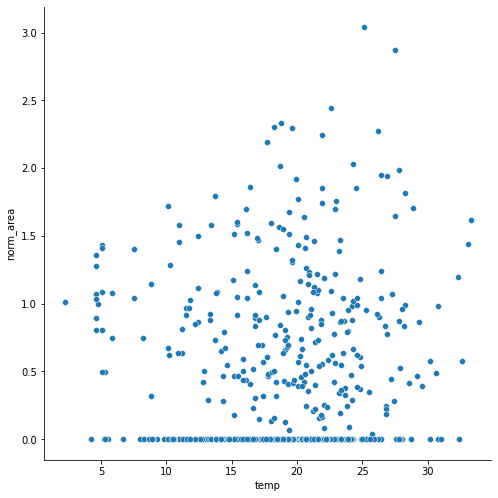

In [199]:
# Create new scatter plot for relationship between burned area and temp

sbn.pairplot(df, x_vars="temp", y_vars='norm_area', height=7, aspect=1, kind='scatter')

### **Simple Linear Regression**

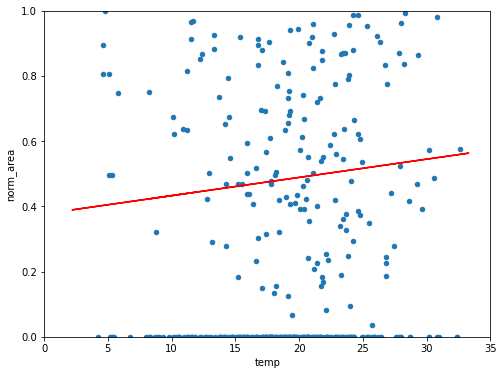

In [207]:
# Let's use simple linear regression for Temp vs. Normalized Area
from sklearn import linear_model
lm = linear_model.LinearRegression()

x = df['temp'].values.reshape(-1,1)
y = df['norm_area'].values.reshape(-1,1)

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

# plot the best fit linear model
df.plot(kind='scatter', x='temp', y='norm_area', figsize=(8, 6))

plt.axis([0, 35, 0, 1])

plt.plot(x, t0 + t1*x, "r")

plt.show()

### **Linear Regression Using 80-20 Hold-Out**

In [208]:
# Let's experiment again, but this time split the data into training and testing sets
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [209]:
# 80% of 517 cases are used for training now
x_train.shape

(413, 1)

In [210]:
# 20% of 517 cases are set aside for testing
x_test.shape

(104, 1)

In [211]:
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [0.3657534]
Slope : [[0.00652634]]


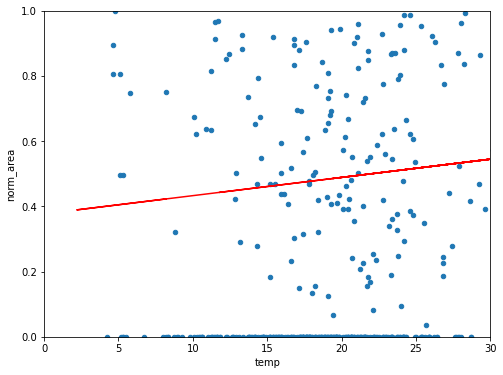

In [212]:
# plot the discovered linear model
df.plot(kind='scatter', x='temp', y='norm_area', figsize=(8, 6))

plt.axis([0, 30, 0, 1])

plt.plot(x, t0 + t1*x, "r")

plt.show()

### **Linear Model: area = 0.3658 + 0.0065 * temp** 

In [213]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)


print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.004574997224866095
Mean squared error: 0.33721489144635675


### **R2 score**: -0.004574997224866095
### **Mean Squared Error**: 0.33721489144635675

## **Area and Relative Humidity**
Relative Humidity measured in percent
For all subsequent analyses, area will be substituted by norm_area.


### **Scatter Plot of Data**

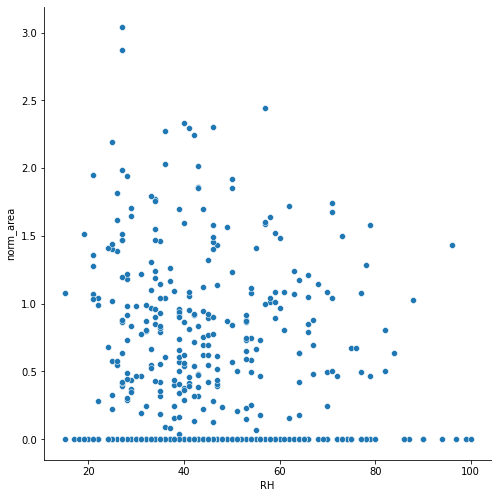

In [214]:
# First, create scatter plot for relationship between burned area and temp

sbn.pairplot(df, x_vars="RH", y_vars='norm_area', height=7, aspect=1, kind='scatter')

### **Simple Linear Regression**

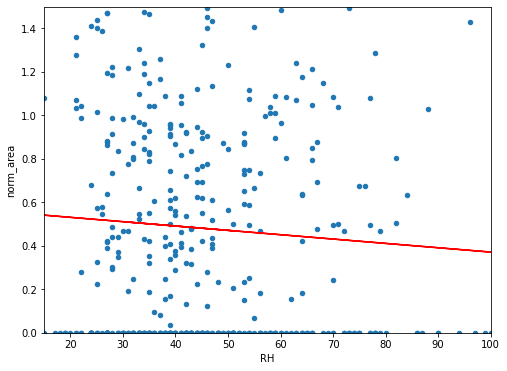

In [215]:
# Let's use simple linear regression for Temp vs. Normalized Area
from sklearn import linear_model
lm = linear_model.LinearRegression()

x = df['RH'].values.reshape(-1,1)
y = df['norm_area'].values.reshape(-1,1)

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

# plot the best fit linear model
df.plot(kind='scatter', x='RH', y='norm_area', figsize=(8, 6))

plt.axis([15, 100, 0, 1.5])

plt.plot(x, t0 + t1*x, "r")

plt.show()

### **Linear Regression Using 80-20 Hold-Out**

In [216]:
# Let's experiment again, but this time split the data into training and testing sets
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [217]:
# 80% of 517 cases are used for training now
x_train.shape

(413, 1)

In [218]:
# 20% of 517 cases are set aside for testing
x_test.shape

(104, 1)

In [219]:
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [0.5682677]
Slope : [[-0.00181982]]


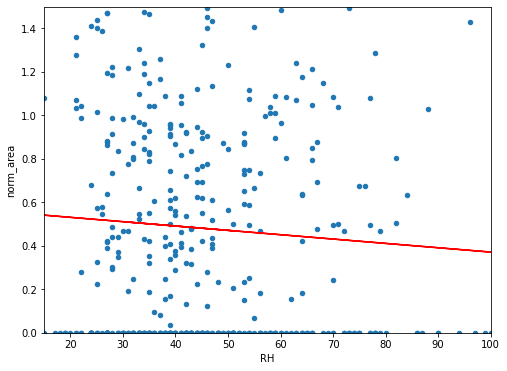

In [220]:
# plot the discovered linear model
df.plot(kind='scatter', x='RH', y='norm_area', figsize=(8, 6))

plt.axis([15, 100, 0, 1.5])

plt.plot(x, t0 + t1*x, "r")

plt.show()

### **Linear Model: area = 0.5683 - 0.0018 * relative humidity** 

In [158]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)


print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: 0.002807391126103842
Mean squared error: 0.33473677752428593


### **R2 score**: 0.002807391126103842
### **Mean Squared Error**: 0.33473677752428593

## **Area and Wind**
Wind speed measured in km/h measured.



### **Scatter Plot of Data**

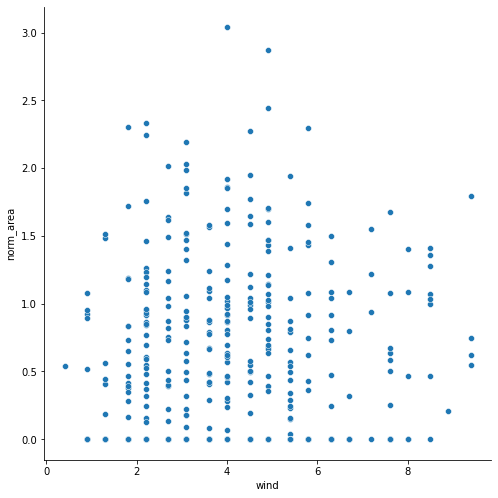

In [159]:
# First, create scatter plot for relationship between burned area and temp

sbn.pairplot(df, x_vars="wind", y_vars='norm_area', height=7, aspect=1, kind='scatter')

### **Simple Linear Regression**

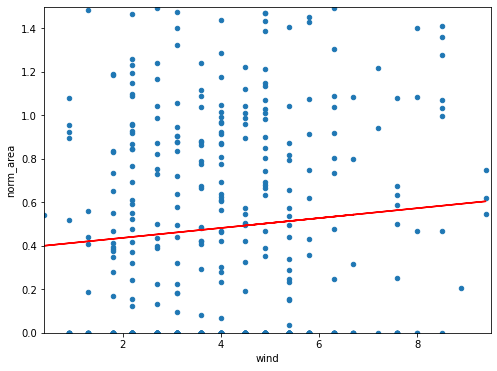

In [160]:
# Let's use simple linear regression for Temp vs. Normalized Area
from sklearn import linear_model
lm = linear_model.LinearRegression()

x = df['wind'].values.reshape(-1,1)
y = df['norm_area'].values.reshape(-1,1)

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

# plot the best fit linear model
df.plot(kind='scatter', x='wind', y='norm_area', figsize=(8, 6))

plt.axis([0.4, 9.5, 0, 1.5])

plt.plot(x, t0 + t1*x, "r")

plt.show()

### **Linear Regression Using 80-20 Hold-Out**

In [161]:
# Let's experiment again, but this time split the data into training and testing sets
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [ ]:
# 80% of 517 cases are used for training now
x_train.shape

(413, 1)

In [162]:
# 20% of 517 cases are set aside for testing
x_test.shape

(104, 1)

In [163]:
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [0.39716962]
Slope : [[0.02255892]]


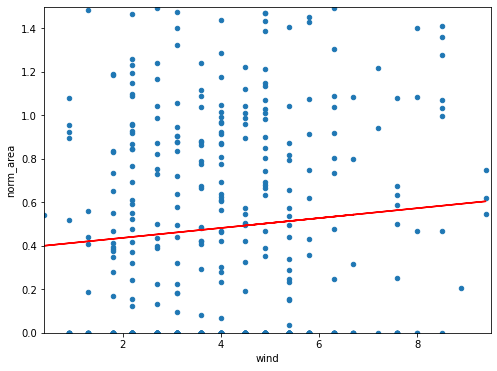

In [168]:
# plot the discovered linear model
df.plot(kind='scatter', x='wind', y='norm_area', figsize=(8, 6))

plt.axis([0.4, 9.5, 0, 1.5])

plt.plot(x, t0 + t1*x, "r")

plt.show()

### **Linear Model: area = 0.3972 + 0.0226 * wind speed** 

In [169]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)


print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: 0.0023451377048031574
Mean squared error: 0.33489194636455694


### **R2 score**: 0.0023451377048031574
### **Mean Squared Error**: 0.33489194636455694


## **Area and Rain**
Outside rain measured in mm/m2.



### **Data Processing**

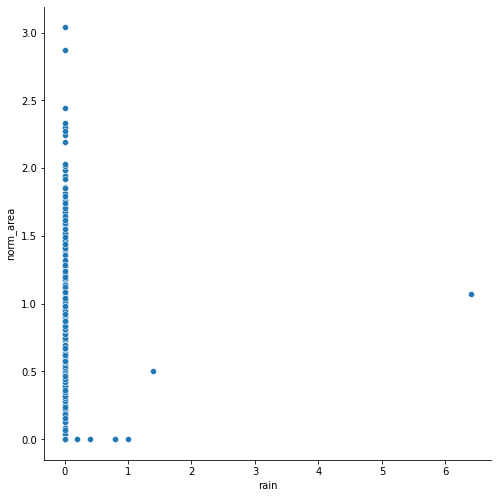

In [170]:
# First, create scatter plot for relationship between burned area and temp

sbn.pairplot(df, x_vars="rain", y_vars='norm_area', height=7, aspect=1, kind='scatter')

There's clearly outliers in this scatterplot. Excluding these outliers would improve the linear regression.

In [221]:
# Get value of 99% quartile
q = df["rain"].quantile(0.99)

# Remove outliers where rain is more than 99% quartile
removed = df[df["rain"] < q]


In [222]:
# size of removed data frame
removed.shape

(511, 14)

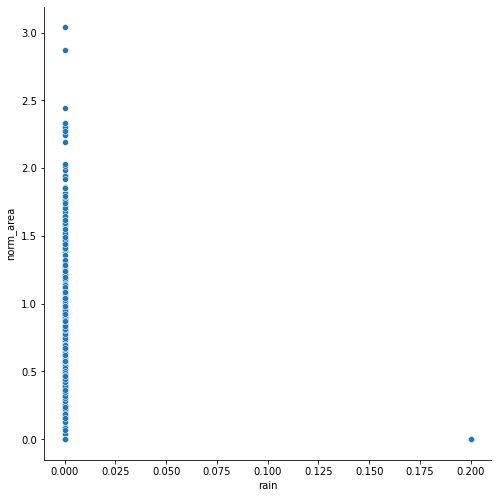

In [223]:
# Replot without outliers
sbn.pairplot(removed, x_vars="rain", y_vars='norm_area', height=7, aspect=1, kind='scatter')

### **Simple Linear Regression**

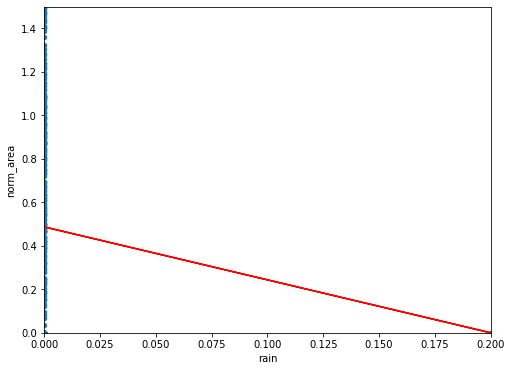

In [224]:
# Let's use simple linear regression for Temp vs. Normalized Area
from sklearn import linear_model
lm = linear_model.LinearRegression()

x = removed['rain'].values.reshape(-1,1)
y = removed['norm_area'].values.reshape(-1,1)

# Fit the model using .fit() method
lm.fit(x, y)

# intercept and slope values
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

# plot the best fit linear model
removed.plot(kind='scatter', x='rain', y='norm_area', figsize=(8, 6))

plt.axis([0.0, 0.2, 0, 1.5])

plt.plot(x, t0 + t1*x, "r")

plt.show()

### **Linear Regression Using 80-20 Hold-Out**

In [225]:
# Let's experiment again, but this time split the data into training and testing sets
# random_state control the shuffling of input data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, 
                                                          test_size = 0.2, 
                                                          random_state = 100)

In [226]:
# 80% of 511 cases are used for training now
x_train.shape

(408, 1)

In [227]:
# 20% of 511 cases are set aside for testing
x_test.shape

(103, 1)

In [228]:
lm.fit(x_train, y_train)
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : [0.46794819]
Slope : [[0.]]


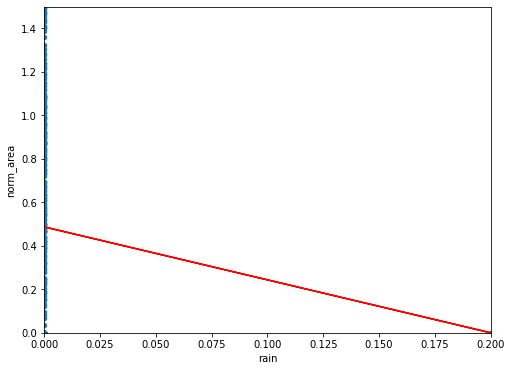

In [229]:
# plot the discovered linear model
removed.plot(kind='scatter', x='rain', y='norm_area', figsize=(8, 6))

plt.axis([0.0, 0.2, 0, 1.5])

plt.plot(x, t0 + t1*x, "r")

plt.show()

### **Linear Model: area = 0.4679 - 0.0 * rainfall** 

In [230]:
# Let's make predictions on the data and evaluate the model using the R² and MSE values
'''
R2 is a statistic that will give some information about the goodness of fit of a model. 
In regression, the R2 coefficient of determination is a statistical measure of how well 
the regression predictions approximate the real data points. An R2 of 1 indicates that 
the regression predictions perfectly fit the data.
'''
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)


print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.016903279698367468
Mean squared error: 0.4355198452101953


### **R2 score**: -0.016903279698367468
### **Mean Squared Error**: 0.4355198452101953



## **Tabulated results**:

In general, linear regression is not appropriate for this dataset. The relationships between area burned and temp, relative humidity or windspeed all plotted as very scattered graphs. Rain and area burned almost had a mutually-exclusive relationship. Most fires (regardless of size) occurred when there was little or no rain outside. With the exception of a few outliers (beyond the 99th percentile), no fires or few, very small fires ocurred when there was (very small amounts) of rain. In general, when the relative humidity was higher, the size/number of fires was lower.

Linear regression worked "best" to describe the relationship between RH and fire size or wind and fire size. It had the least success predicting the relationship between rain and fire size.

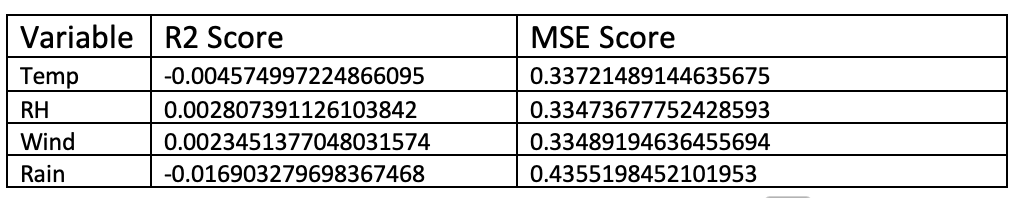